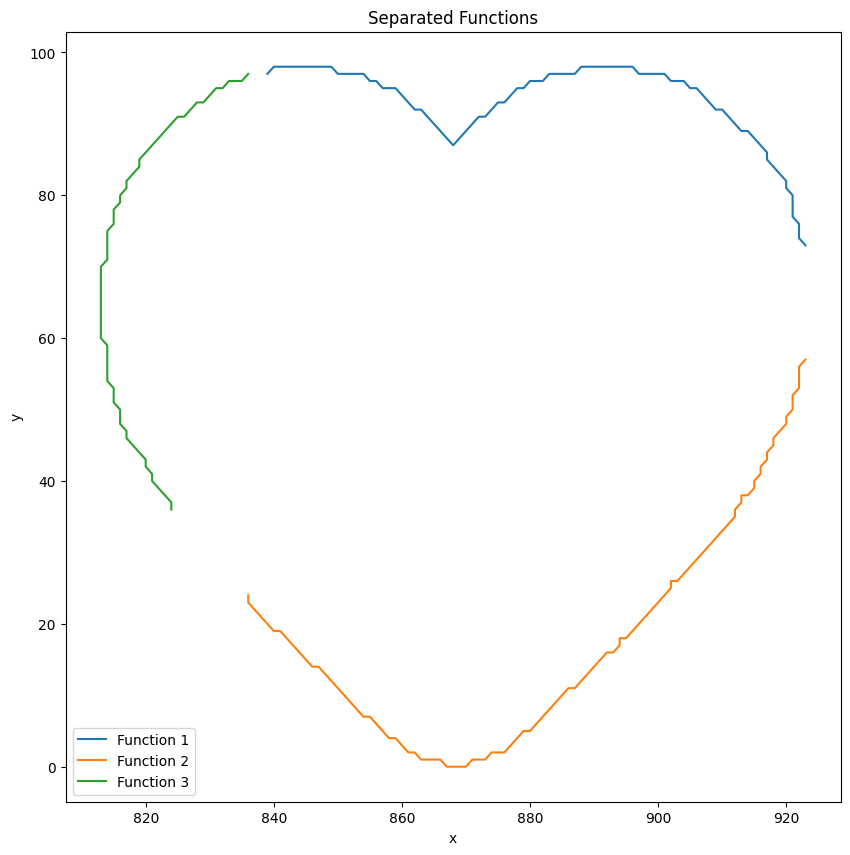

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Предположим, что у вас есть массив points, где каждая строка представляет собой точку (x, y)
# points = np.array([[x1, y1], [x2, y2], ...])

# Функция для разделения функций на основе разрывов
def separate_functions(points, threshold=10):
    functions = []
    current_function = [points[0]]  # Начинаем с первой точки
    for i in range(1, len(points)):
        if abs(points[i][1] - points[i-1][1]) > threshold:  # Если разрыв в значениях y больше порога
            functions.append(np.array(current_function))
            current_function = [points[i]]  # Начинаем новую функцию
        else:
            current_function.append(points[i])
    functions.append(np.array(current_function))  # Добавляем последнюю функцию
    return functions

# Визуализация найденных функций
def visualize_functions(functions):
    plt.figure(figsize=(10, 10))
    for i, function in enumerate(functions):
        plt.plot(function[:, 0], function[:, 1], label=f'Function {i+1}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Separated Functions')
    plt.legend()
    plt.show()


points = []
xs,ys = [],[]
with open("output.txt", "r") as f:
    for i in f.readlines():
        x, y = i.split(',')
        if x == 'end':
            continue
        xs.append(int(x))
        ys.append(int(y))
ys = np.array(ys)
ys = max(ys)-ys
points = np.array(list(zip(xs,ys)))

# Смешиваем точки трех функций
# points = np.concatenate((np.column_stack((x_values, y_values1)), np.column_stack((x_values, y_values2)), np.column_stack((x_values, y_values3))))

# Разделяем функции на основе разрывов
functions = separate_functions(points)

# Визуализируем найденные функции
visualize_functions(functions)


In [28]:
import numpy as np
from sklearn.mixture import GaussianMixture
# X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
gm = GaussianMixture(n_components=2, random_state=0).fit(points)
gm.means_
gm.predict(points)

In [37]:
import numpy as np
points = []
xs,ys = [],[]
with open("output.txt", "r") as f:
    for i in f.readlines():
        x, y = i.split(',')
        if x == 'end':
            continue
        xs.append(int(x))
        ys.append(int(y))
ys = np.array(ys)
ys = max(ys)-ys
points = np.array(list(zip(xs,ys)))

d:\Apps\Python\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


{0, 1, 2, 3, 4, 5, 6, 7}


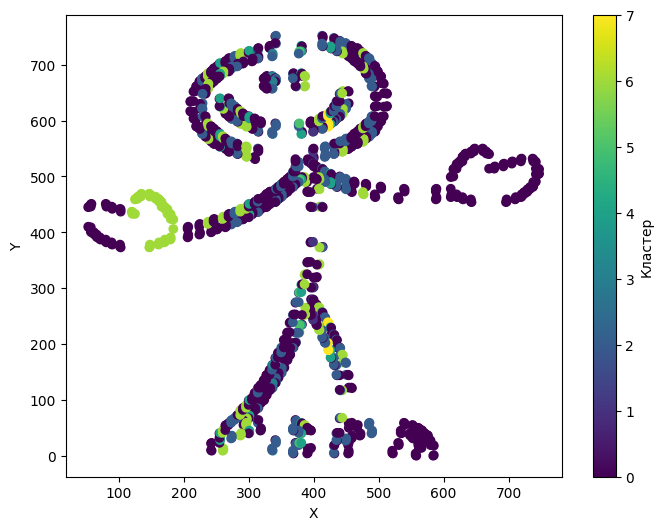

In [39]:
from sklearn import cluster
spectral = cluster.SpectralClustering(eigen_solver="arpack", affinity="nearest_neighbors")
clusters = spectral.fit_predict(np.array(xs).reshape(-1,1), ys)
print(set(clusters))
plt.figure(figsize=(8, 6))
plt.scatter(xs, ys, c=clusters, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Кластер')
plt.show()